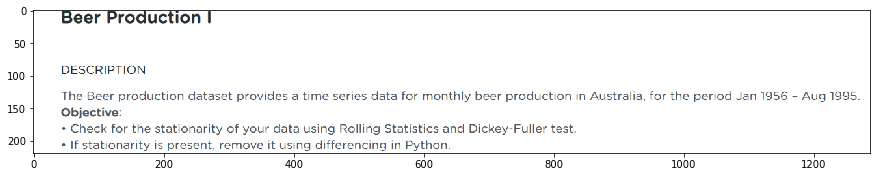

In [1]:
#Problem statment

import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir('D:\Simplilearn Goal\Machine Learning course\Practise projects\Lesson 8-Time Series Modeling')
img=plt.imread('Capture.png')
plt.figure(figsize=(15,4))
plt.imshow(img)

In [2]:
#import Required libraries
import pandas as pd
import numpy as np
import math
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('monthly-beer-production-in-austr.csv')

In [4]:
df['Month']=df['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))

In [5]:
df=df.set_index('Month')

In [6]:
ts=df['Monthly beer production in Australia']
ts_log=np.log(ts)

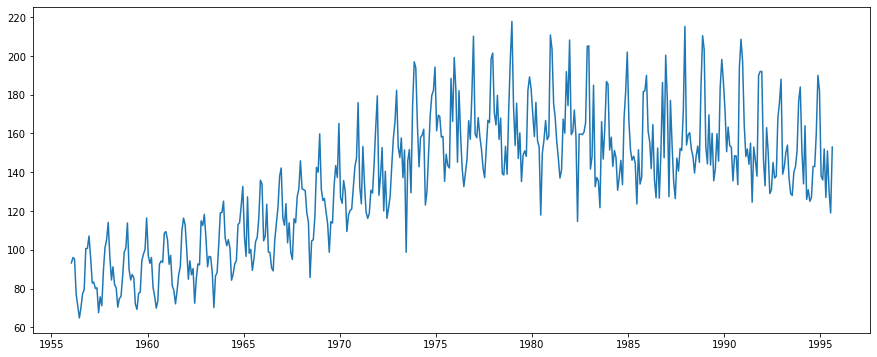

In [7]:
plt.plot(df['Monthly beer production in Australia'])

In [8]:
def test_stationary(timeseries):
    rollmean=timeseries.rolling(window=52,center=False).mean()
    rollstd=timeseries.rolling(window=52,center=False).std()
    org=plt.plot(timeseries,color='blue',label='orginal')
    mean=plt.plot(rollmean,color='red',label='mean')
    std=plt.plot(rollstd,color='black',label='std')
    plt.legend()
    plt.show()
    
    print(' Dicker full test result:')
    df_test=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(df_test[0:4],index=['Text Statistic','p-value','#Lags used','Number of Observations used'])
    
    for key,value in df_test[4].items():
        dfoutput['critical value (%s)'%key]=value
    print(dfoutput)

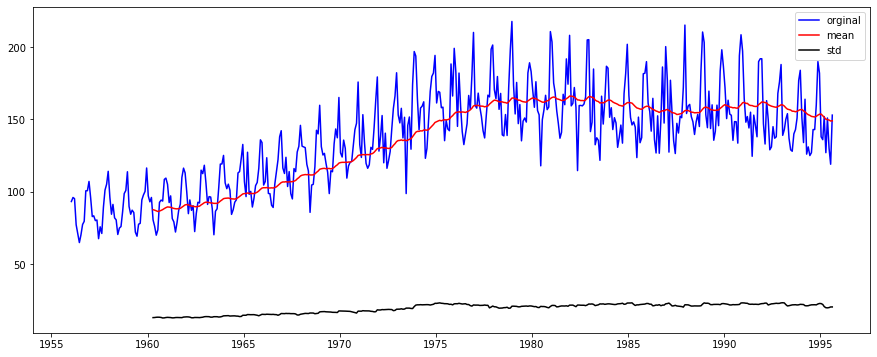

 Dicker full test result:
Text Statistic                  -2.282661
p-value                          0.177621
#Lags used                      17.000000
Number of Observations used    458.000000
critical value (1%)             -3.444709
critical value (5%)             -2.867871
critical value (10%)            -2.570142
dtype: float64


In [9]:
test_stationary(ts)

In [10]:
#Here Text statistic is greater than critical value  we could accept the null hypothesis and time series is not stationary

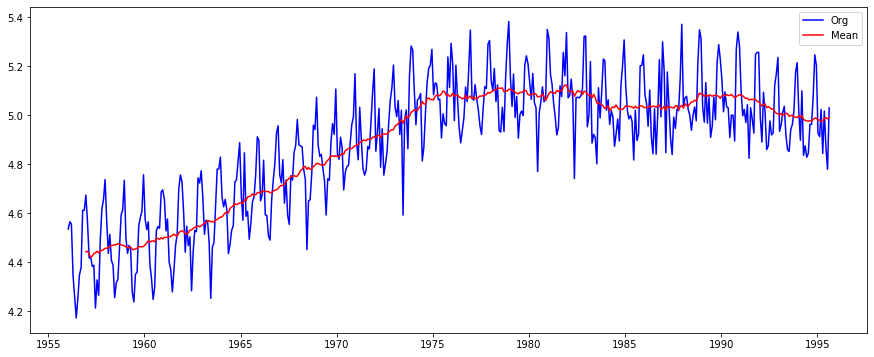

In [11]:
MoveAverage=ts_log.rolling(window=12,center=False).mean()
MoveStd=ts_log.rolling(window=12,center=False).std()
org=plt.plot(ts_log,color='Blue',label='Org')
Mean=plt.plot(MoveAverage,color='Red',label='Mean')
plt.legend()
plt.show()

In [12]:
ts_log_mv_diff=ts_log-MoveAverage
ts_log_mv_diff.head()
ts_log_mv_diff.dropna(inplace=True)

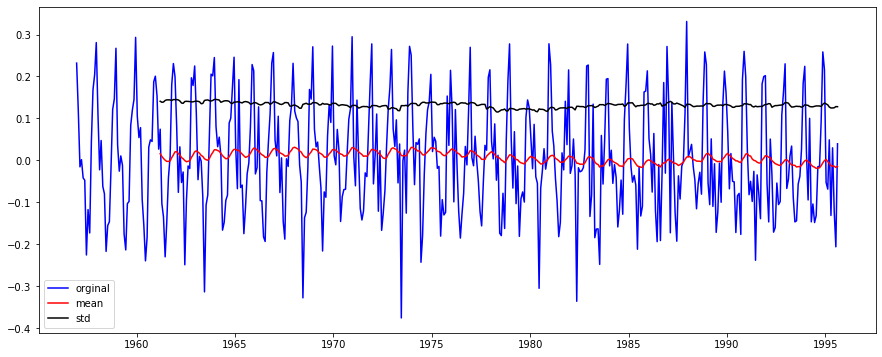

 Dicker full test result:
Text Statistic                  -3.432559
p-value                          0.009898
#Lags used                      13.000000
Number of Observations used    451.000000
critical value (1%)             -3.444933
critical value (5%)             -2.867970
critical value (10%)            -2.570195
dtype: float64


In [13]:
test_stationary(ts_log_mv_diff)

In [14]:
#After removing the stationarly values we could met the createria as we could reject the null hypothesis as text statistic < critical value


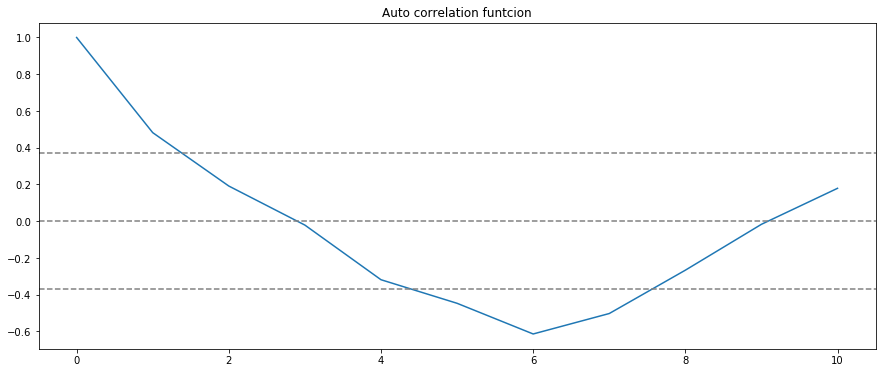

In [15]:
#Ploting acf graph
plt.plot(np.arange(0,11),acf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='grey')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='grey')
plt.title('Auto correlation funtcion')
plt.show()

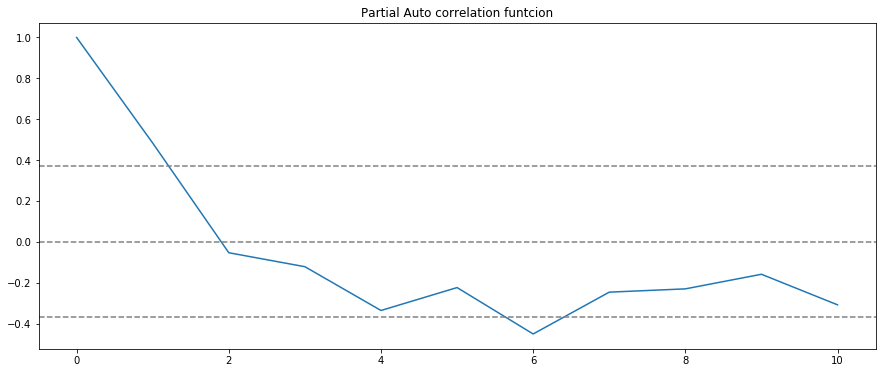

In [16]:
#Ploting acf graph
plt.plot(np.arange(0,11),pacf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='grey')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='grey')
plt.title('Partial Auto correlation funtcion')
plt.show()

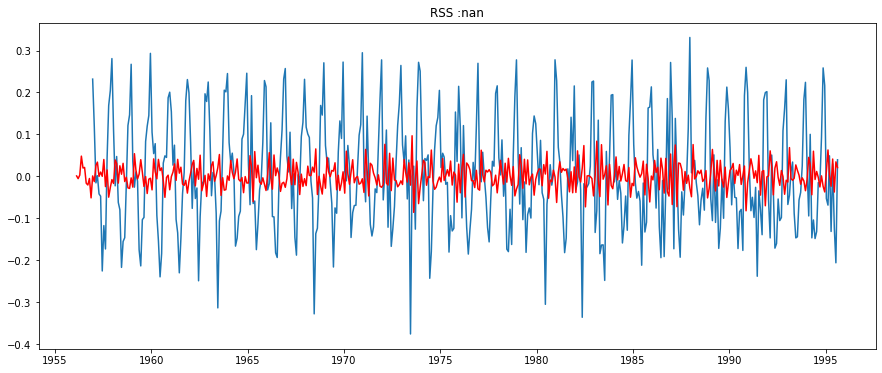

In [17]:
model=ARIMA(ts_log,order=(1,1,0))
results_ARIMA=model.fit(disp=-1)
plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS :%.4f'%sum((results_ARIMA.fittedvalues[1:]-ts_log_mv_diff)**2))
plt.show()

In [18]:
#model predictions
pred_arima_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
pred_arima_diff.head()

Month
1956-02-15    0.000936
1956-03-15   -0.005458
1956-04-15    0.003012
1956-05-15    0.048189
1956-06-15    0.019847
dtype: float64

In [19]:
pred_arima_diff_cum_sum=pred_arima_diff.cumsum()
pred_arima_diff_cum_sum.head()

Month
1956-02-15    0.000936
1956-03-15   -0.004522
1956-04-15   -0.001510
1956-05-15    0.046680
1956-06-15    0.066527
dtype: float64

In [25]:
pred_Arima_log=pd.Series(ts_log.ix[0],index=ts_log.index)
pred_Arima_log=pred_Arima_log.add(pred_arima_diff_cum_sum,fill_value=0)
pred_Arima_log.head()

Month
1956-01-15    4.534748
1956-02-15    4.535684
1956-03-15    4.530226
1956-04-15    4.533238
1956-05-15    4.581428
dtype: float64

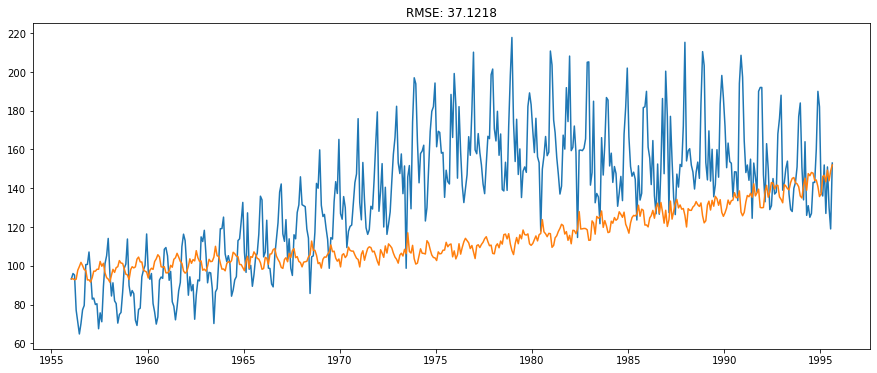

In [24]:
#### predictions_ARIMA=np.exp(pred_Arima_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'%np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
plt.show()